
# CHAPTER 4: DATA CLEANING AND PREPARATION
**(Week 5-6: Lecture Notes)**

---

### 1. INTRODUCTION: WHY DO WE CLEAN?
In the real world, data never comes clean like in textbooks.
*   Sensor breaks -> Data cuts off (NaN).
*   Operator types wrong -> Writes "twenty" instead of Age.
*   System errors -> Temperature reads 9999 degrees (Outlier).

**Golden Rule (GIGO):** Garbage In, Garbage Out. A Machine Learning model trained with dirty data makes faulty predictions. This section is where a data scientist spends the most overtime.




---
## WEEK 5: MISSING DATA AND OUTLIERS

### 5.1. MISSING DATA (NaN)
In Python, missing data appears as `NaN` (Not a Number) or `None`.
**Problem:** Machine learning algorithms (like Scikit-learn) do not like gaps; they give errors. They must be filled or deleted.

#### A) Detection (Diagnosis)
First, we look at "How sick is the patient?"



--- Is Null Table ---
   Student  Midterm  Final  Absence
0    False    False  False    False
1    False     True  False    False
2    False    False   True    False
3    False    False  False    False
4    False     True  False    False

--- Missing Count ---
Student    0
Midterm    2
Final      1
Absence    0
dtype: int64


<Axes: >

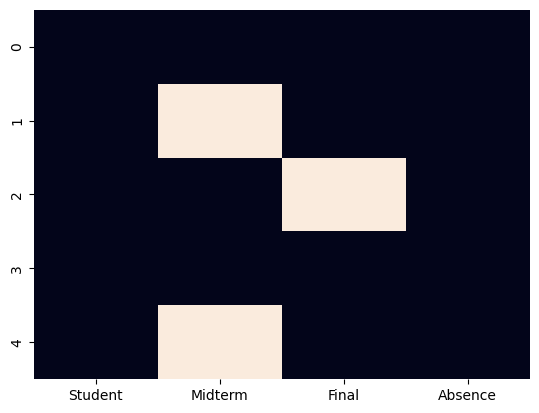

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Let's Create a Sample Dataset
data = {
    'Student': ['Ali', 'Veli', 'Ayse', 'Fatma', 'Mehmet'],
    'Midterm': [80, np.nan, 90, 70, np.nan],  # 2 missing
    'Final': [85, 70, np.nan, 60, 50],      # 1 missing
    'Absence': [2, 4, 0, 1, 10]
}
df = pd.DataFrame(data)

# 1. General Check (Which cell is empty?)
print("--- Is Null Table ---")
print(df.isnull()) # Returns True/False table

# 2. Summary Number (How many empties in which column?) - *Most Frequently Used*
print("\n--- Missing Count ---")
print(df.isnull().sum())

# 3. Visual Check (Heatmap)
# Shows missing values graphically
sns.heatmap(df.isnull(), cbar=False)



#### B) Method 1: Deletion
It is the easiest but riskiest method. You lose data.



In [2]:
# 1. Drop empty rows (Drops the row if ANY cell is empty)
df_clean = df.dropna()

# 2. Drop only if specific column is empty
# (Delete student without Midterm, don't touch if Final is missing)
df_midterm_full = df.dropna(subset=['Midterm'])

print(f"Original Shape: {df.shape}")
print(f"Cleaned Shape: {df_clean.shape}")


Original Shape: (5, 4)
Cleaned Shape: (2, 4)



*   **When to use?** If your dataset is huge (1 Million rows) and missing data is very small (1%), deleting makes sense.




#### C) Method 2: Imputation (Engineering Approach)
Instead of deleting, we fill it with a logical value.

**1. For Numerical Data:**
*   **Mean:** Used if data is normally distributed.
*   **Median:** Used if there are extreme outliers (Outliers) in data. (Because mean deviates, median is robust).
*   **Constant Value:** For example, writing "0" for missing grades.

**2. For Categorical Data:**
*   **Mode:** Filled with the most repeating value. (E.g., if Car Color is empty, write the best-selling "White").



In [3]:
# Fill Midterm grades with MEAN
mean_val = df['Midterm'].mean()
df['Midterm'] = df['Midterm'].fillna(mean_val)

# Fill Final grades with CONSTANT NUMBER (0) (Assumption: Did not take the exam)
df['Final'] = df['Final'].fillna(0)

print(df)


  Student  Midterm  Final  Absence
0     Ali     80.0   85.0        2
1    Veli     80.0   70.0        4
2    Ayse     90.0    0.0        0
3   Fatma     70.0   60.0        1
4  Mehmet     80.0   50.0       10



### 5.2. OUTLIERS
These are extreme values that do not fit the general structure of the data.
*   **Example:** Human ages: 20, 25, 30, **200**. (200 is an error or exception).
**Problem:** Outliers spoil the average and confuse the model.

#### A) Detection: IQR Method (Box Plot Logic)
We use the logic of quartiles. Rule:
*   **Q1:** Lower Quartile (25%)
*   **Q3:** Upper Quartile (75%)
*   **IQR (Width):** Q3 - Q1
*   **Lower Bound:** Q1 - 1.5 * IQR
*   **Upper Bound:** Q3 + 1.5 * IQR
*Values outside these bounds are Outliers.*



In [4]:
# Let's have Age data (Contains 200)
ages = pd.Series([20, 22, 25, 24, 21, 23, 200, 22])

# 1. Calculate Quartiles
Q1 = ages.quantile(0.25)
Q3 = ages.quantile(0.75)
IQR = Q3 - Q1

# 2. Determine Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Find Outliers
outliers = ages[ (ages < lower_bound) | (ages > upper_bound) ]
print("Outliers:\n", outliers)


Outliers:
 6    200
dtype: int64



#### B) Handling
1.  **Deletion:** We throw the 200-year-old record out of the table.
2.  **Capping:** We equalize those larger than the upper limit to the upper limit. (Like pulling 200 to the upper limit of 30).



In [5]:
# Filtering (Deletion) Method
clean_ages = ages[ (ages >= lower_bound) & (ages <= upper_bound) ]
print("Clean Ages Count:", len(clean_ages))


Clean Ages Count: 7



### 5.3. DATA TYPE CONVERSION AND CLEANING
Sometimes numerical data comes as "String" (Text). We cannot process without fixing.
*   **Example:** Price column: "$100", "$200". (Thought as text because of dollar sign).



In [6]:
# Example DataFrame
df_product = pd.DataFrame({'Price': ['$100', '$200', '$300', 'Error']})

# 1. Turn faulty data (Error) into NaN (coerce parameter)
# If we don't use errors='coerce', it crashes.
df_product['Price'] = pd.to_numeric(df_product['Price'], errors='coerce')

# Note: If dollar signs persist, string replace is needed first:
# df['Price'] = df['Price'].str.replace('$', '').astype(float)

print(df_product)


   Price
0    NaN
1    NaN
2    NaN
3    NaN



### 5.4. DUPLICATE DATA
Sometimes due to system error, the same record is written twice. It is a simple but important step of data cleaning.



In [7]:
# Is there any repeating row?
print(df.duplicated().sum())

# See the duplicates
duplicates = df[df.duplicated()]

# Delete Duplicates (Keep only the first one, throw the rest)
df = df.drop_duplicates(keep='first')
# keep='first': Keeps the first one.
# keep='last': Keeps the last one.
# keep=False: Deletes all of them.


0



---
## WEEK 6: DATA MERGING & JOINING

In real life, data does not stay in a single Excel file.
*   **Customer Info:** In Database A.
*   **Sales Info:** In Database B.
*   **Salaries:** In Excel file.
To analyze these, we need to turn them into a single table (**Join**). This topic is very familiar to those who know SQL.

### 6.1. CONCATENATION (Stacking)
If columns of two tables are the same, we paste them one under another. (January sales + February sales).



In [13]:
# Jan and Feb data
df_jan = pd.DataFrame({'Product': ['A', 'B'], 'Sales': [100, 200]})
df_feb = pd.DataFrame({'Product': ['A', 'C'], 'Sales': [150, 300]})

# Concatenate (axis=0 is default: Top to Bottom)
df_total = pd.concat([df_jan, df_feb], ignore_index=True)
# If we don't say ignore_index=True, indices repeat as 0,1,0,1.

print(df_total)


  Product  Sales
0       A    100
1       B    200
2       A    150
3       C    300



### 6.2. MERGING / JOINING (Side by Side)
Merging side by side using a common column (**Key**) in two tables.
**Scenario:**
*   **Table 1 (Customers):** ID, Name
*   **Table 2 (Orders):** Order_No, ID, Amount
**Goal:** Find who placed which order (Bring names next to orders).

**Code Preparation:**



In [14]:
customers = pd.DataFrame({
    'Customer_ID': [1, 2, 3, 4],
    'Name': ['Ali', 'Ayse', 'Veli', 'Zeynep']
})

orders = pd.DataFrame({
    'Order_ID': [101, 102, 103, 104],
    'Customer_ID': [1, 1, 3, 5], # Note: 2(Ayse) didn't order, 5(Unknown) exists.
    'Amount': [250, 400, 150, 500]
})



**Merge Types (Venn Diagram Logic)**

**1. INNER JOIN (Intersection):** Brings only records present in both tables.
*   Customers who placed orders and have records. (Ayse and number 5 go away).



In [15]:
df_inner = pd.merge(customers, orders, on='Customer_ID', how='inner')
print("--- Inner Join ---\n", df_inner)


--- Inner Join ---
    Customer_ID  Name  Order_ID  Amount
0            1   Ali       101     250
1            1   Ali       102     400
2            3  Veli       103     150



**2. LEFT JOIN (Keep Left):** Keep all of the left table (Customers). If there is a match from right, bring it; otherwise leave empty (NaN).
*   List all customers, write amount if they ordered, leave empty if not.



In [16]:
df_left = pd.merge(customers, orders, on='Customer_ID', how='left')
# Ayse appears in the list but Amount becomes NaN.
print("--- Left Join ---\n", df_left)


--- Left Join ---
    Customer_ID    Name  Order_ID  Amount
0            1     Ali     101.0   250.0
1            1     Ali     102.0   400.0
2            2    Ayse       NaN     NaN
3            3    Veli     103.0   150.0
4            4  Zeynep       NaN     NaN



**3. RIGHT JOIN (Keep Right):** Keep all of the right table (Orders).
*   List all orders, write name if customer record exists.

**4. OUTER JOIN (Union):** Bring everything from both tables. Unmatched places become NaN.




### 6.3. PIVOT TABLE (King of Reporting)
It is exactly the same as Pivot Table in Excel. Used to summarize big data.
**Question:** Which customer placed how much total order?



In [17]:
summary_table = df_left.pivot_table(
    index='Name',        # What should be in rows?
    values='Amount',     # Which number to aggregate inside?
    aggfunc='sum'        # How to calculate? (sum, mean, count)
)
print(summary_table)


        Amount
Name          
Ali      650.0
Ayse       0.0
Veli     150.0
Zeynep     0.0



### Important ..

1.  **Copy Warning (SettingWithCopyWarning):** In Pandas, if you assign to a filtered data like `df_new = df[df['Age']>20]` and then say `df_new['Age'] = 0`, you get a red warning.
    *   **Solution:** Use `.copy()` while filtering: `df_new = df[df['Age']>20].copy()`
2.  **String Cleaning:** "Ali" and "ali " (with space) do not match while merging. Before merging, definitely use `.str.strip()` (delete space) and `.str.lower()` (lowercase) to standardize texts.
3.  **Merge vs Concat:**
    *   If table structures are same (Columns same), use **Concat** to add bottom-to-top.
    *   If table contents are different but have a common key, use **Merge** to add side-by-side.




---
## 7. WEEKLY CHALLENGE (Homework)

**Task:** We continue working with "Titanic" data.

1.  Fill the gaps in the "Age" column in the dataset with the average age based on passengers' titles (Mr, Mrs, Miss). *(Hint: `groupby` and `transform` can be used, or simply fill with global average).*
2.  There are too many gaps in the "Cabin" column. Delete this column completely.
3.  The "Embarked" (Port) info in the dataset is given as letters (S, C, Q). Make a `map` or `replace` operation to change these to full names (Southampton, Cherbourg, Queenstown).

